In [8]:
import pandas as pd  #pandas dataframe library
import numpy as np   #lineaer algebra calculation
import matplotlib.pyplot as plt  #data visualization


In [9]:
df = pd.read_csv('data.csv')


In [10]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [11]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [12]:
df.head(7)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889


In [13]:
df.Height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
3496    69.296830
3497    70.542201
3498    73.912549
3499    67.396021
3500    72.738970
Name: Height, Length: 3501, dtype: float64

In [14]:
df.Weight.head(6)


0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
5    152.212156
Name: Weight, dtype: float64

In [15]:
df['Weight'].head(9)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
5    152.212156
6    183.927889
7    167.971111
8    175.929440
Name: Weight, dtype: float64

In [16]:
df[5:9]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440


In [17]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [18]:
df.Weight.mean()


186.891257979463

In [19]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [20]:
df.Height.std()

2.858583328142099

In [21]:
row,col = df.shape

In [22]:
row

3501

In [23]:
col

2

In [24]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Vizualization

Text(0.5, 1.0, 'Height-Weight Scatter')

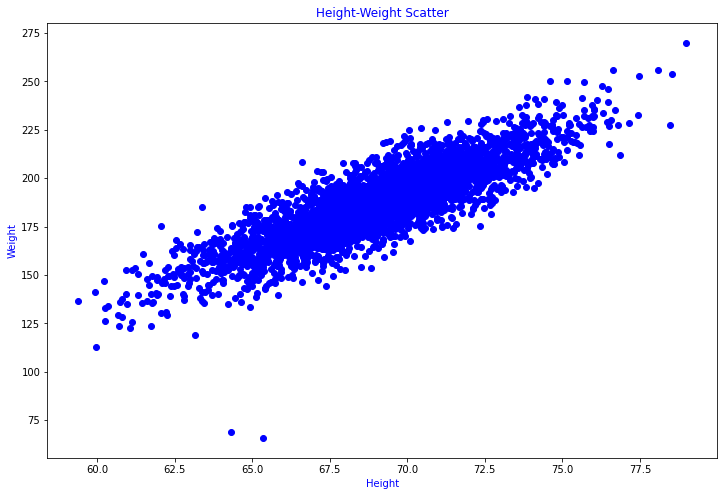

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height, df.Weight,marker='o',color='blue')
plt.xlabel('Height',color='blue')
plt.ylabel('Weight',color='blue')
plt.title('Height-Weight Scatter', color='blue')

In [26]:
#x&y separation
x = df[['Height']]#single dimension not allowed
y = df['Weight']

In [27]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [28]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Split the dataset into train & test

In [29]:
from sklearn.model_selection import train_test_split as tts

In [30]:
#train 70%, test 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.3)

In [31]:
xtrain.head()

,Height
937,68.321453
36,69.076171
3254,69.907081
1487,73.279445
61,69.552005


In [32]:
ytrain.head()

937     206.426147
36      197.488243
3254    183.280807
1487    209.228854
61      198.079524
Name: Weight, dtype: float64

In [33]:
xtest.head()

,Height
2996,73.903670
1455,67.591895
3401,64.970718
2889,71.969598
3002,66.528266


In [34]:
ytest.head()

2996    206.641217
1455    174.434991
3401    166.753111
2889    210.494003
3002    164.724935
Name: Weight, dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
reg =  LinearRegression()

In [38]:
reg.fit(xtrain,ytrain)#training

LinearRegression()

In [41]:
m = reg.coef_ #m
m

array([6.02282183])

In [42]:
c = reg.intercept_
c #c

-228.84636343365742

In [51]:
x1 = 69.881796
y = m*x1 + c
y

array([192.03924295])

In [46]:
x2 = 73.27
y = m*x2 + c
y

array([212.44579196])

In [47]:
reg.predict([[73.27]])

C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([212.44579196])

In [48]:
pred = reg.predict(xtest)

In [49]:
pred

array([216.26227468, 178.24757506, 162.460698  , ..., 142.63213842,
       149.3205453 , 180.31183635])

In [50]:
df ['predicted result'] = reg.predict(x)
df

,Height,Weight,predicted result
0,73.847017,241.893563,215.921063
1,68.781904,162.310473,185.414790
2,74.110105,212.740856,217.505597
3,71.730978,220.042470,203.176539
4,69.881796,206.349801,192.039242
...,...,...,...
3496,69.296830,185.649086,188.516097
3497,70.542201,210.198845,196.016747
3498,73.912549,202.429960,216.315751
3499,67.396021,144.277671,177.067862


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
mse = mean_squared_error(ytest,pred)

In [56]:
mse

99.69190037308286

In [57]:
mae = mean_absolute_error(ytest,pred)

In [58]:
mae

8.049535007346208

# Best fit line

C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Weight
Feature names seen at fit time, yet now missing:
- Height

  warnings.warn(message, FutureWarning)


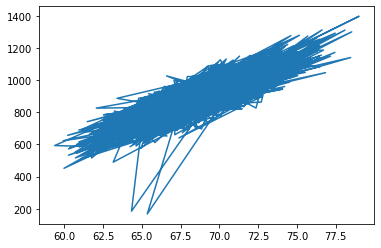

In [60]:
plt.plot(df.Height, reg.predict(df[['Weight']])) #best fit for total

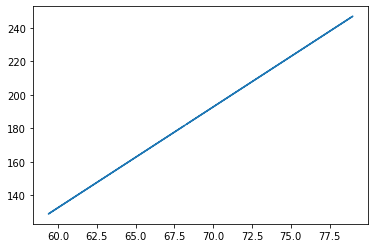

In [61]:
plt.plot(xtrain, reg.predict(xtrain))

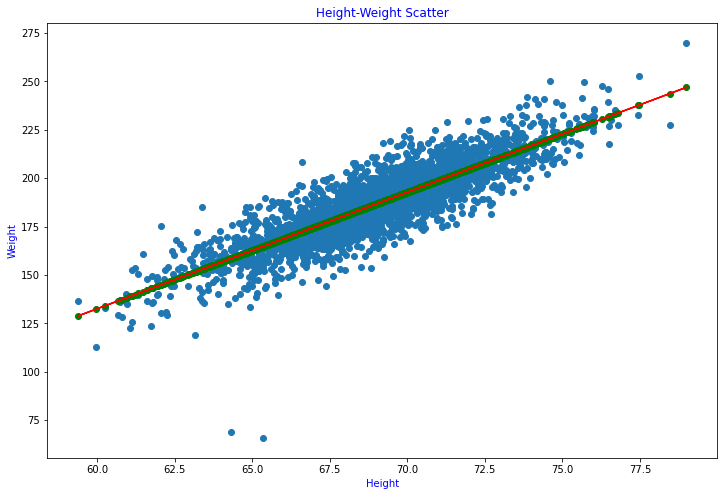

In [62]:
plt.figure(figsize=(12,8))

plt.xlabel('Height',color='blue')
plt.ylabel('Weight',color='blue')
plt.title('Height-Weight Scatter', color='blue')
plt.plot(xtrain, reg.predict(xtrain),color='red')
plt.scatter(xtrain,ytrain)
plt.scatter(xtrain, reg.predict(xtrain),color='green')

